In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\gm194\Downloads\GasPricesinBrazil.csv', encoding= "UTF-8", sep = ";")


### Executando funções para cada item de um Dataframe ou Series
Uma alternativa ao `for-loop` que vimos anteriormente e que é _lento_, é usarmos _funções próprias do pandas_ que **aplicam/mapeiam uma dada função a todos os elementos de um DataFrame ou Series**, retornando novos elementos "transformados".


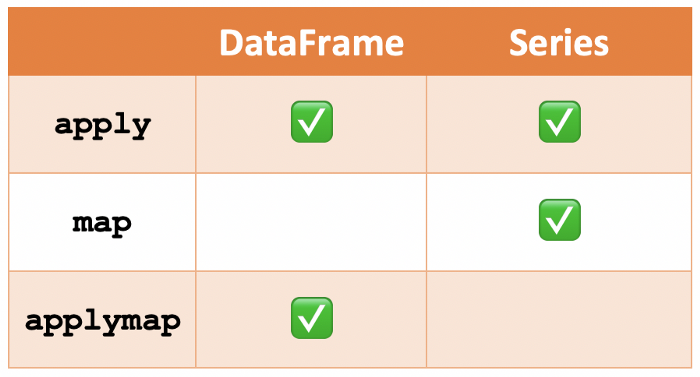

**apply()** é usado para aplicar uma função ao longo de um eixo de um Dataframe ou em valores de uma Series

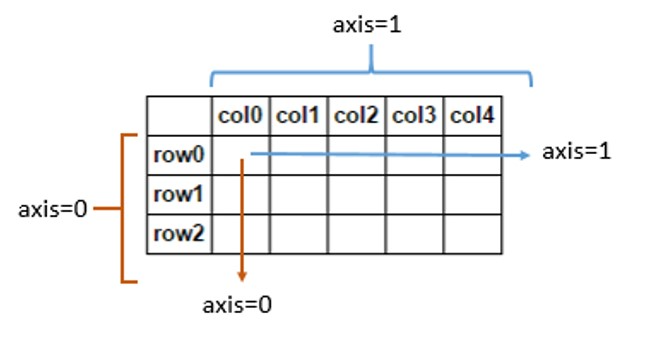

In [53]:
df = pd.DataFrame({ 'A': [1, 2, 3, 4], 
                    'B': [10, 20, 30, 40],
                    'C': [100, 200, 300, 400]}, 
                     index=['Linha 1', 'Linha 2', 'Linha 3', 'Linha 4'])

df


,A,B,C
Linha 1,1,10,100
Linha 2,2,20,200
Linha 3,3,30,300
Linha 4,4,40,400


In [55]:
def nossa_soma(series):
    return series.sum()  # retorna a soma de todos os valores de uma series

In [56]:
# aplica a função soma para cada linha do dataframe
df['SOMA(A, B, C)'] = df.apply(nossa_soma, axis=1)
df

,A,B,C,"SOMA(A, B, C)"
Linha 1,1,10,100,111
Linha 2,2,20,200,222
Linha 3,3,30,300,333
Linha 4,4,40,400,444


In [57]:
## Somando valores de uma coluna
df.loc['Linha 5'] = df.apply(nossa_soma, axis=0)
df

,A,B,C,"SOMA(A, B, C)"
Linha 1,1,10,100,111
Linha 2,2,20,200,222
Linha 3,3,30,300,333
Linha 4,4,40,400,444
Linha 5,10,100,1000,1110


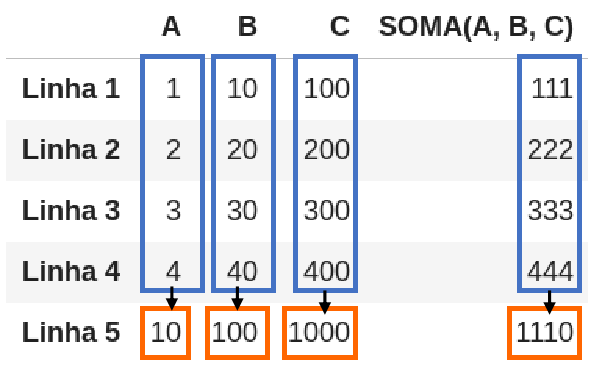

##### Usando `lambda` functions
 permite a criação de funções anônimas, ou seja, sem necessidade de dar um nome para elas

In [58]:
df['MEDIA(A, B, C)'] = df[['A', 'B', 'C']].apply(lambda series: series.mean(), axis=1)
df

,A,B,C,"SOMA(A, B, C)","MEDIA(A, B, C)"
Linha 1,1,10,100,111,37.0
Linha 2,2,20,200,222,74.0
Linha 3,3,30,300,333,111.0
Linha 4,4,40,400,444,148.0
Linha 5,10,100,1000,1110,370.0


<br/>

`applymap()`: usado para aplicar uma função para **cada elemento** (_element-wise_) de um DataFrame.

In [59]:
df = pd.DataFrame({ 'A': [1, 2, 3, 4], 
                    'B': [10, 20, 30, 40],
                    'C': [100, 200, 300, 400]}, 
                     index=['Linha 1', 'Linha 2', 'Linha 3', 'Linha 4'])
df

,A,B,C
Linha 1,1,10,100
Linha 2,2,20,200
Linha 3,3,30,300
Linha 4,4,40,400


In [60]:
# retorna um novo dataframe com todos os elementos ao quadrado.
# poderíamos usar uma função ao invés de uma lambda function
df.applymap(lambda x: x ** 2) ## Retornando uma cópia do nosso dataframe

C:\Users\gm194\AppData\Local\Temp\ipykernel_23496\3314123372.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x ** 2)


,A,B,C
Linha 1,1,100,10000
Linha 2,4,400,40000
Linha 3,9,900,90000
Linha 4,16,1600,160000


In [62]:
## Nosso Dataframe normal 
df

,A,B,C
Linha 1,1,10,100
Linha 2,2,20,200
Linha 3,3,30,300
Linha 4,4,40,400


<br/>

`map()`: usado para aplicar uma função para **cada elemento** (_element-wise_) de uma _Series_.

In [63]:
nomes = pd.Series(['João', 'Maria', 'Alice', 'Pedro'])
nomes

0     João
1    Maria
2    Alice
3    Pedro
dtype: object

In [64]:
# retorna uma nova Series com todos os nomes com letras maiuscúlas.
# poderíamos usar uma função ao invés de uma lambda function
nomes.map(lambda x: x.upper())

0     JOÃO
1    MARIA
2    ALICE
3    PEDRO
dtype: object